# K-Fold CV for Classification
## CMSE 381 - Fall 2023
## Oct 9,  2023. Lecture 15



In [18]:
# Everyone's favorite standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold


# 1. CV for a classification data set
![Palmer Penguins Picture](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)

*Artwork by @allison_horst*


For this lab, we are going to use the <a href = "https://allisonhorst.github.io/palmerpenguins/">Palmer Penguins</a> data set by Allison Horst, Alison Hill, and Kristen Gorman. This data set was originally posted in R, but has helpfully been loaded as an easily readable python data set by installing the `palmerpenguins` package using `pip`. 



In [19]:
# You should only have to do this once:
%pip install palmerpenguins

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: /opt/miniconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [20]:
# If it worked, this should load our dataset
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


As always, when playing with a new data set, your first job is to just get a feel for what's in the data. We're going to use this data to predict species of the penguin given the other information.

&#9989; **<font color=red>Questions:</font>** 
- How many penguins are in the data set? 
- What are the input variables? 
- What are the possible values of the output variable? 
- Which are categorical varaibales? Which are quantitative? 
- Are there any lines with missing data? How is missing data represented in this data set? 

In [21]:
# 1. How many penguins are in the data set?
print(f"Number of penguins: {len(penguins)}")

# 2. What are the input variables?
print("\nInput variables:")
print(penguins.columns.tolist())

# 3. What are the possible values of the output variable (species)?
print("\nPossible species values:")
print(penguins['species'].unique())

# 4. Which are categorical variables? Which are quantitative?
print("\nVariable types:")
categorical = ['species', 'island', 'sex', 'year']  # year could be treated either way
quantitative = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

print("Categorical:", categorical)
print("Quantitative:", quantitative)

# 5. Are there any lines with missing data? How is missing data represented?
print("\nMissing data summary:")
print(penguins.isnull().sum())

# Optional: Show rows with missing data
print("\nSample rows with missing data:")
print(penguins[penguins.isnull().any(axis=1)].head())

Number of penguins: 344

Input variables:
['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex', 'year']

Possible species values:
['Adelie' 'Gentoo' 'Chinstrap']

Variable types:
Categorical: ['species', 'island', 'sex', 'year']
Quantitative: ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

Missing data summary:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

Sample rows with missing data:
   species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
3   Adelie  Torgersen             NaN            NaN                NaN   
8   Adelie  Torgersen            34.1           18.1              193.0   
9   Adelie  Torgersen            42.0           20.2              190.0   
10  Adelie  Torgersen            37.8           17.1              186.0   
11  

&#9989; **<font color=red>Do this:</font>** Spoiler alert, there are penguins with missing data. Replace the `penguins` dataframe with one where you have removed all those lines. (*Hint: this should be a one line operation*)

In [22]:
penguins_clean = penguins.dropna()

print(f"Original rows: {len(penguins)}")
print(f"Clean rows: {len(penguins_clean)}")
print("\nMissing values in cleaned data:")
print(penguins_clean.isnull().sum())

Original rows: 344
Clean rows: 333

Missing values in cleaned data:
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64


Our next favorite thing to do with any data set is to start trying to visualize relationships between the variables. 

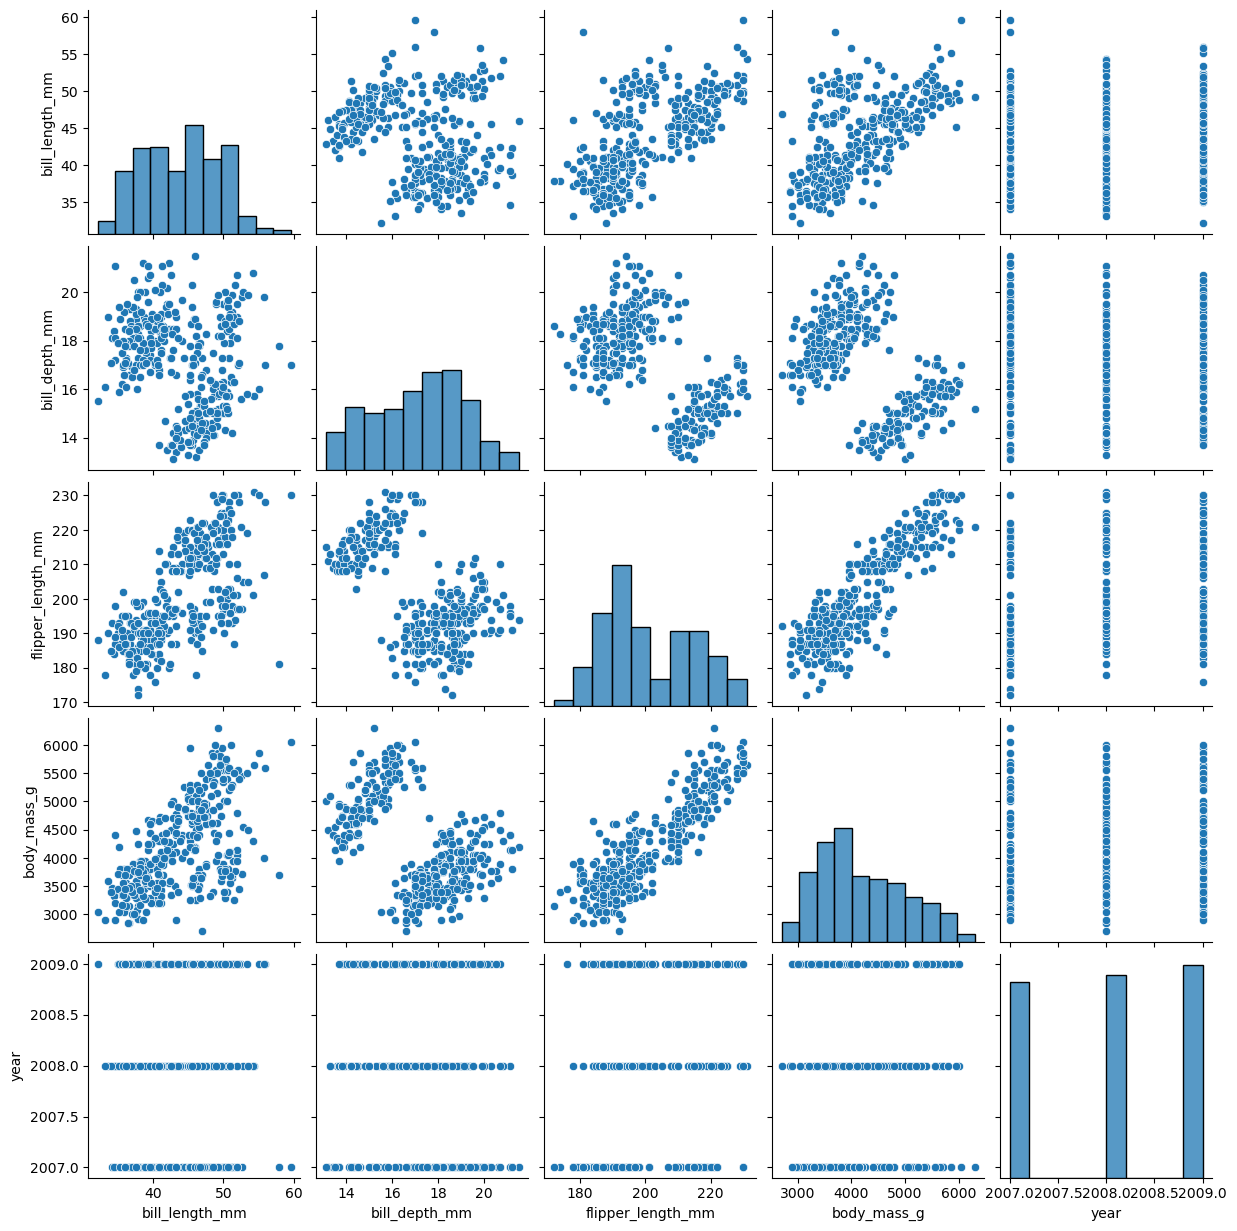

In [23]:
sns.pairplot(penguins)

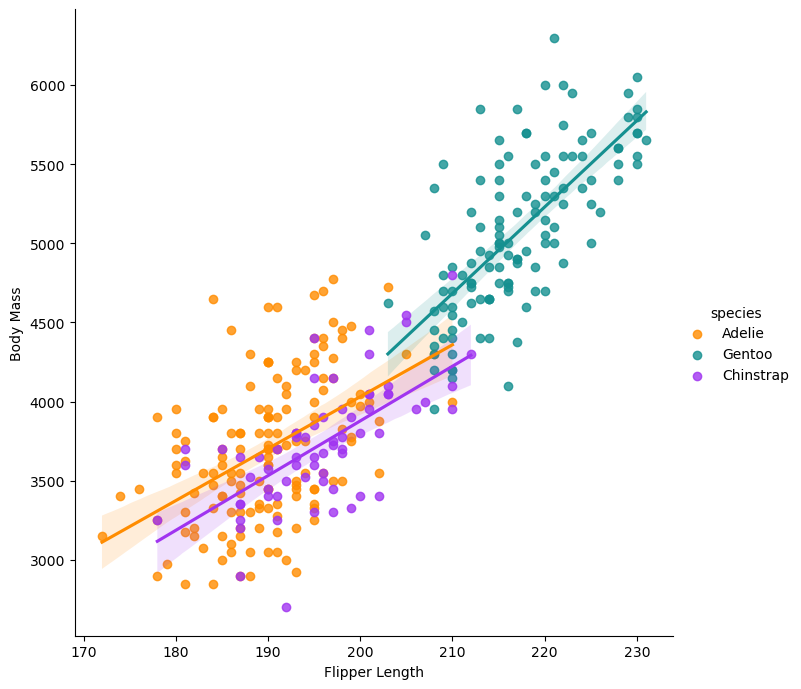

In [24]:
#Here is another nice visualization taken from the palmerpenguins github
g = sns.lmplot(x="flipper_length_mm",
               y="body_mass_g",
               hue="species",
               height=7,
               data=penguins,
               palette=['#FF8C00','#159090','#A034F0'])
g.set_xlabels('Flipper Length')
g.set_ylabels('Body Mass')

## Step 1: Set up your arrays 

Ok, you have your penguins data frame.  
- Build an array $X$ with `island` and `sex` replaced with dummy variable(s)
- Save an array of the entries in `penguins.species` as $y$ (you can use the `name_of_series.values` command, or just make a list works too). 

In [25]:
# Your code here. Feel free to make more cells, I spread this out over at least 
# 5 while I was trying to get everything up and running. 
# Load and clean data
penguins = load_penguins()

# Define X (features) and y (target)
X = penguins[['island', 'sex', 'bill_length_mm', 'bill_depth_mm', 
              'flipper_length_mm', 'body_mass_g']]
y = penguins['species']

# Drop rows with missing values in X or y
data_clean = pd.concat([X, y], axis=1).dropna()
X_clean = data_clean.drop(columns='species')
y_clean = data_clean['species'].values

# Convert categorical vars to dummy (0/1)
X_final = pd.get_dummies(X_clean, columns=['island', 'sex'], drop_first=False).astype(int)

# Verify
print("X shape:", X_final.shape)
print("y shape:", y_clean.shape)
print("\nFirst 5 rows of X:")
print(X_final.head())
print("\nFirst 5 values of y:")
print(y_clean[:5])

X shape: (333, 9)
y shape: (333,)

First 5 rows of X:
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0              39             18                181         3750   
1              39             17                186         3800   
2              40             18                195         3250   
4              36             19                193         3450   
5              39             20                190         3650   

   island_Biscoe  island_Dream  island_Torgersen  sex_female  sex_male  
0              0             0                 1           0         1  
1              0             0                 1           1         0  
2              0             0                 1           1         0  
4              0             0                 1           1         0  
5              0             0                 1           0         1  

First 5 values of y:
['Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie']


## Step 2: Run logistic regression

Ok, you have your penguins data with input variables as X and we are going to predict `penguins.species`. While `scikitlearn` cannot handle input variables that are categorical (hence why we had to put in our dummy variables ourselves), it's find with a predictor variable that is. The following code will fit a logistic regression on the whole data set. Of course, you know better than to actually do this to return your results, so in a moment we will be modifying this to get $k$-fold CV test errors. 

In [26]:
logisticmodel = LogisticRegression(max_iter = 1400) # Note, I needed to up the interations
                                                   # to get rid of a convergence warning

logisticmodel.fit(X, y)

ValueError: could not convert string to float: 'Torgersen'

Also here's some helpful code to remember how to get accuracy/error rates out of classification modules in `scikitlearn`.

In [27]:
# and now we can also get the error rate on the training set. 
from sklearn.metrics import accuracy_score
yhat = logisticmodel.predict(X)
accuracy = accuracy_score(yhat, y)
# Note that accuracy is the percentage correct
print('Accuracy:', accuracy)
# so the percentage incorrect is
print('Error:', 1-accuracy)

# We can get the same info directly from the original model
print('\nAccuracy version 2:', logisticmodel.score(X,y))

ValueError: could not convert string to float: 'Torgersen'

&#9989; **<font color=red>Do this:</font>** Ok, your job, should you choose to accept it, is to 
- Train a model predicing `species` from all the input variables using logistic regression. 
- Use $k$-fold cross validation to determine the test error. I would recommend using something like $k=5$ to start building your code, but you can up it to $k=10$ when you want to see better results. 
- *Hint: while I was building my version, I had to set the `max_iter` for Logistic regression pretty high to get the model to converge. However, my error results were still pretty reasonable with lower `max_iter`, ignoring the massive amount of pink warning boxes. Feel free to mess around with this parameter to see how it affects your output.*

In [30]:
from sklearn.model_selection import cross_val_score

model = LogisticRegression(max_iter=1000)

cv_scores = cross_val_score(model, X_final, y_clean, cv=5)

print(f"Cross-validation accuracy (k=5): {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

/opt/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Cross-validation accuracy (k=5): 0.988 ± 0.011


/opt/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




-----
### Congratulations, we're done!
Written by Dr. Liz Munch, Michigan State University

<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.